# Assignment 2 - Text classification benchmarks - ```Neural Networks```

This assignment is about using ```scikit-learn``` to train simple (binary) classification models on text data. For this assignment, we'll continue to use the Fake News Dataset that we've been working on in class.

For this exercise, you should write *two different scripts*. One script should train a logistic regression classifier on the data; the second script should train a neural network on the same dataset. Both scripts should do the following:

- Save the classification report to a text file the folder called ```out```
- Save the trained models and vectorizers to the folder called ```models```

## Objective

This assignment is designed to test that you can:

1. Train simple benchmark machine learning classifiers on structured text data;
2. Produce understandable outputs and trained models which can be reused;
3. Save those results in a clear way which can be shared or used for future analysis

## Some notes

- Saving the classification report to a text file can be a little tricky. You will need to Google this part!
- You might want to challenge yourself to create a third script which vectorizes the data separately, and saves the new feature extracted dataset. That way, you only have to vectorize the data once in total, instead of once per script. Performance boost!

## Additional comments

Your code should include functions that you have written wherever possible. Try to break your code down into smaller self-contained parts, rather than having it as one long set of instructions.

For this assignment, you are welcome to submit your code either as a Jupyter Notebook, or as ```.py``` script. If you do not know how to write ```.py``` scripts, don't worry - we're working towards that!

Lastly, you are welcome to edit this README file to contain whatever information you like. Remember - documentation is important.

## Import ```packages```

In [25]:
# system tools
import os
import sys

# data munging tools
import pandas as pd

# Machine learning stuff
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

## Loading the ```Fake News``` data-set

In [8]:
os.getcwd()

'/work/CDS-language/CDS-language/Assignments/Assignment2_lang/src'

In [9]:
# load the data to pandas df
filename = os.path.join("..",
                        "..", 
                        "..",
                        "..",
                        "cds-language_all",
                        "data",
                        "fake_or_real_news.csv")

data = pd.read_csv(filename, index_col=0)

## Train/test

In [10]:
# create data variables with "text" and "label"

X = data["text"] # the text 
y = data["label"] # labels for classification 

# split it with 80% train - using the scikit-learn "train_test_split"-function
X_train, X_test, y_train, y_test = train_test_split(X,         
                                                    y,         
                                                    test_size=0.2,   
                                                    random_state=42) 

## Vectorize

In [35]:
# We use the same vectorizer as for the logistic regression. 
# we have already saved it, so we will load it in 

from joblib import dump, load
loaded_vect = load("../models/tfidf_vectorizer.joblib")


# fit to the training data
X_train_feats = loaded_vect.fit_transform(X_train)

# fit to test data
X_test_feats = loaded_vect.transform(X_test)

# extract feature names
feature_names = loaded_vect.get_feature_names_out()

## Predicting

In [36]:
# fit the data to a neural network classifier
# make classifier 
classifier = MLPClassifier(activation = "logistic",
                           hidden_layer_sizes = (20,),
                           max_iter=1000,
                           random_state = 42)

# fit it
classifier = classifier.fit(X_train_feats, y_train)

# make predictions 
y_pred = classifier.predict(X_test_feats)

# print them 
print(y_pred[:10]) # 7/10 fake

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'REAL']


## Evaluate

We can also do some quick calculations, in order to assess just how well our model performs.

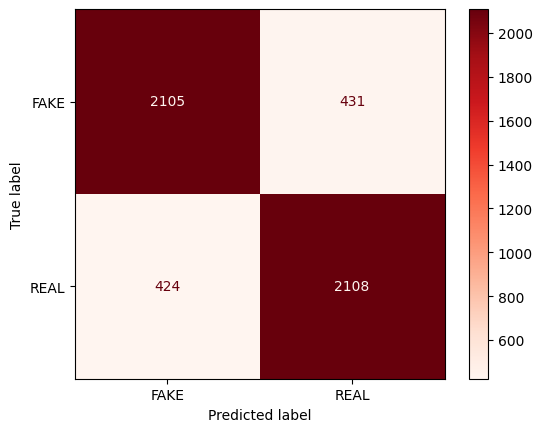

In [37]:
# use confusion matrix to check performance
metrics.ConfusionMatrixDisplay.from_estimator(classifier,         
                                            X_train_feats,          
                                            y_train,             
                                            cmap=plt.cm.Reds,      
                                            labels=["FAKE", "REAL"])

In [38]:
# get classification report
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.84      0.82      0.83       628
        REAL       0.83      0.85      0.84       639

    accuracy                           0.84      1267
   macro avg       0.84      0.83      0.83      1267
weighted avg       0.84      0.84      0.84      1267



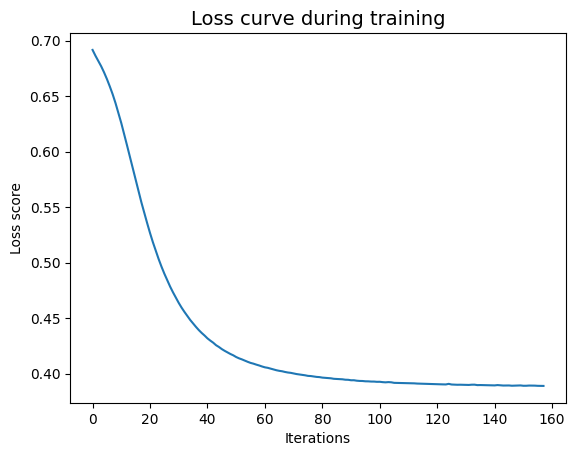

In [30]:
# loss curve 
plt.plot(classifier.loss_curve_)
plt.title("Loss curve during training", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss score')
plt.show()

# looks good! 

## Save Model and Report

In [39]:
from joblib import dump, load
dump(classifier, "../models/MLP_classifier.joblib")

['../models/MLP_classifier.joblib']

In [43]:
# save report 
f = open('../out/classification_report_NN.txt', 'w') # open in write mode
f.write(classifier_metrics) # write the variable into the txt file 
f.close()